<h1>COLOR COMPRESSION USING KMEANS</h1>
<h3>Nguyễn Việt Kim - 21127333</h3>

In this notebook, we will implement the k-means algorithm to compress an image from input folder to a compressed image to the ouput folder.

We first import needed libraries for reading images.

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np

The <i>read_image()</i> function return the image read from the folder using a path after reshaping.

In [20]:
# Read image
def read_image():
    img = mpl.image.imread("test1.jpg")
    img.reshape(1, -3)
    img = img / 255

    return img

This function is to define means for data points.

In [21]:
def initialize_means(img, clusters):
    # reshaping it or flattening it into a 2d matrix
    points = img.reshape((-1, img.shape[2]))
    m, n = points.shape
 
    # clusters is the number of clusters
    # or the number of colors that we choose.
 
    # means is the array of assumed means or centroids.
    means = np.zeros((clusters, n))
 
    # random initialization of means.
    for i in range(clusters):
        rand_indices = np.random.choice(m, size=10, replace=False)
        means[i] = np.mean(points[rand_indices], axis=0)
 
    return points, means

This is the <i>Euclidean distance </i> function.

In [22]:
# Euclidean distance function for measuring distance between a data point and centroids
def distance(x1, y1, x2, y2):
    distance = np.square(x1 - x2) + np.square(y1 - y2)
    distance = np.sqrt(distance)
    return distance

This is the implementation function of the <i>K-means</i> algorithm.

In [23]:
def k_means(points, means, clusters):
	iterations = 10
	m, n = points.shape

	# these are the index values that correspond to the cluster to which each pixel belongs to.
	index = np.zeros(m)

	# k-means algorithm.
	while iterations > 0:
		for j in range(m):
			# initialize minimum value to a large value
			min_dist = float('inf')
			temp = None

			for k in range(clusters):
				x1, y1 = points[j, 0], points[j, 1]
				x2, y2 = means[k, 0], means[k, 1]

				if distance(x1, y1, x2, y2) <= min_dist:
					min_dist = distance(x1, y1, x2, y2)
					temp = k
					index[j] = k

		for k in range(clusters):
			cluster_points = points[index == k]
			if len(cluster_points) > 0:
				means[k] = np.mean(cluster_points, axis=0)

		iterations -= 1

	return means, index

The <i>compress-image()</i> function is used to call the main K-means algorithm for processing data

In [24]:
def compress_image(means, index, img):
	# recovering the compressed image by assigning each pixel to its corresponding centroid.
	centroid = np.array(means)
	recovered = centroid[index.astype(int), :]
	recovered = recovered.reshape(img.shape)
	plt.imshow(recovered)

Use the pyplot to read our first test image (<i>test1.jpg</i>) from folder and show the image with axis to demonstrate the sizes of the image. 

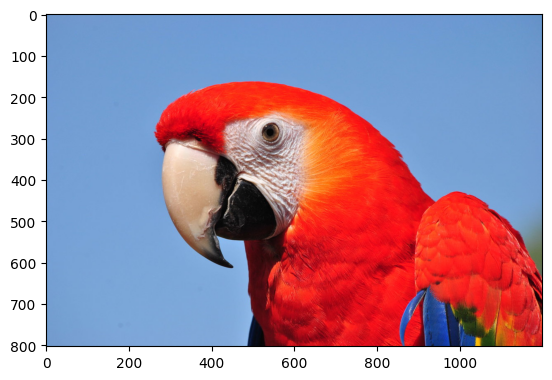

In [29]:
# Read and print the test image
image = mpl.image.imread("test1.jpg")
plt.imshow(image)

Showing the size of the image using <i>image.shape()</i><br>
As shown below, the size of the image is <i> 803x1200 pixel </i> using 3 dimensional color which is RGB.

In [26]:
#Print the shape of the image
image.shape

(803, 1200, 3)

The codes below is the implementation of the <i>main</i> function for compressing the image.<br>
After finish, the program will show the compressed image.

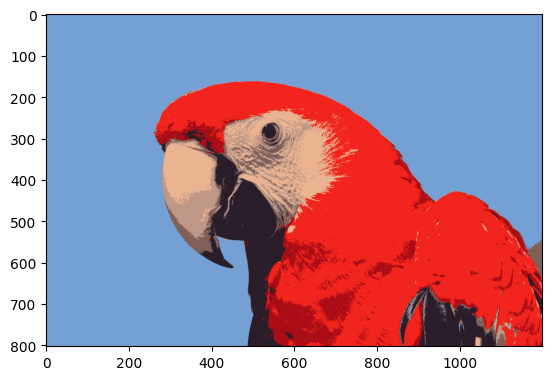

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

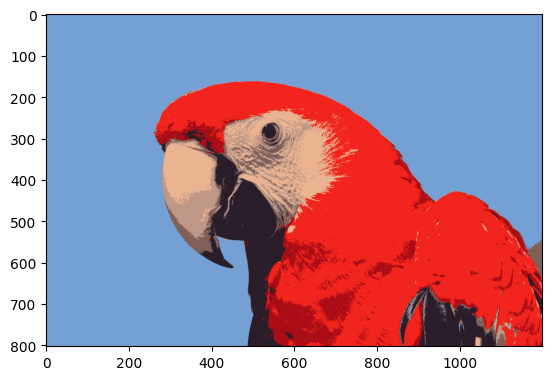

In [28]:
if __name__ == '__main__':
	img = read_image()

	clusters = 7 #Declare cluster number

	points, means = initialize_means(img,clusters)
	means, index = k_means(points, means, clusters)
	compress_image(means, index, img)